In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

#import file into dataframe
data = pd.read_csv('ACS_17_5YR_city_ann.csv', encoding = "ISO-8859-1", low_memory = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3574 entries, 0 to 3573
Columns: 611 entries, GEO.id to HC04_VC218
dtypes: object(611)
memory usage: 16.7+ MB


In [3]:
#create dictionary to translate description to code
dctry = dict(zip(data.columns, data.loc[0]))

#function to search for matching values
def search(values, searchFor):
    d = {}
    for i in searchFor:
        d.update(dict((k, values[k]) for k in values if i in values[k]))
    return d
a = search(dctry, ['Estimate; EDUCATION','Estimate; ANCESTRY'])
del a['HC01_VC95']
del a['HC01_VC96']
a

{'HC01_VC85': 'Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over',
 'HC01_VC86': 'Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Less than 9th grade',
 'HC01_VC87': 'Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - 9th to 12th grade, no diploma',
 'HC01_VC88': 'Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - High school graduate (includes equivalency)',
 'HC01_VC89': 'Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Some college, no degree',
 'HC01_VC90': "Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Associate's degree",
 'HC01_VC91': "Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor's degree",
 'HC01_VC92': 'Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree',
 'HC01_VC185': 'Estimate; ANCESTRY - Total population',
 'HC01_VC186': 'Estimate; ANCESTRY - Total population - American',
 'HC01_VC187': 'Estimate; AN

In [4]:
a = pd.Series(a).apply(lambda x: 'total' if len(x.split(' - ')) < 3 else x.split('-')[2]).str.strip().to_dict()
a = pd.Series(a).apply(lambda x: x.split('(')[0]).str.strip().to_dict()
a['HC01_VC85'] = 'total over 24'
a['HC01_VC185'] = 'total ancestry'
a['GEO.display-label'] = 'location'
a

{'HC01_VC85': 'total over 24',
 'HC01_VC86': 'Less than 9th grade',
 'HC01_VC87': '9th to 12th grade, no diploma',
 'HC01_VC88': 'High school graduate',
 'HC01_VC89': 'Some college, no degree',
 'HC01_VC90': "Associate's degree",
 'HC01_VC91': "Bachelor's degree",
 'HC01_VC92': 'Graduate or professional degree',
 'HC01_VC185': 'total ancestry',
 'HC01_VC186': 'American',
 'HC01_VC187': 'Arab',
 'HC01_VC188': 'Czech',
 'HC01_VC189': 'Danish',
 'HC01_VC190': 'Dutch',
 'HC01_VC191': 'English',
 'HC01_VC192': 'French',
 'HC01_VC193': 'French Canadian',
 'HC01_VC194': 'German',
 'HC01_VC195': 'Greek',
 'HC01_VC196': 'Hungarian',
 'HC01_VC197': 'Irish',
 'HC01_VC198': 'Italian',
 'HC01_VC199': 'Lithuanian',
 'HC01_VC200': 'Norwegian',
 'HC01_VC201': 'Polish',
 'HC01_VC202': 'Portuguese',
 'HC01_VC203': 'Russian',
 'HC01_VC204': 'Scotch',
 'HC01_VC205': 'Scottish',
 'HC01_VC206': 'Slovak',
 'HC01_VC207': 'Subsaharan African',
 'HC01_VC208': 'Swedish',
 'HC01_VC209': 'Swiss',
 'HC01_VC210': 'U

In [5]:
df = data[list(a.keys())].drop(0)
df = df.rename(columns = a)
df.head(3)

,total over 24,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate,"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,total ancestry,American,...,Scotch,Scottish,Slovak,Subsaharan African,Swedish,Swiss,Ukrainian,Welsh,West Indian,location
1,12949,1357,2092,5030,2165,623,1234,448,20249,1718,...,27,37,0,64,28,50,0,0,54,"Abbeville, LA Urban Cluster (2010)"
2,3410,218,637,1146,729,266,271,143,4901,572,...,189,11,26,0,63,81,0,0,0,"Abbeville, SC Urban Cluster (2010)"
3,2582,235,282,1245,418,161,184,57,3883,93,...,9,18,0,0,75,45,19,18,0,"Abbotsford, WI Urban Cluster (2010)"


In [6]:
df = pd.melt(df, id_vars = ['location'], value_vars = df.columns.tolist()[:-1],
           var_name='group', value_name='estimate')
df.location = df.location.str.split('Urban', expand = True)[0]
df.estimate = df.estimate.astype('float')
df.head(2)

,location,group,estimate
0,"Abbeville, LA",total over 24,12949.0
1,"Abbeville, SC",total over 24,3410.0


In [7]:
ancestry = df.group.unique().tolist()[9:]
education_level = df.group.unique().tolist()[1:8]
df.group.unique()

array(['total over 24', 'Less than 9th grade',
       '9th to 12th grade, no diploma', 'High school graduate',
       'Some college, no degree', "Associate's degree",
       "Bachelor's degree", 'Graduate or professional degree',
       'total ancestry', 'American', 'Arab', 'Czech', 'Danish', 'Dutch',
       'English', 'French', 'French Canadian', 'German', 'Greek',
       'Hungarian', 'Irish', 'Italian', 'Lithuanian', 'Norwegian',
       'Polish', 'Portuguese', 'Russian', 'Scotch', 'Scottish', 'Slovak',
       'Subsaharan African', 'Swedish', 'Swiss', 'Ukrainian', 'Welsh',
       'West Indian'], dtype=object)

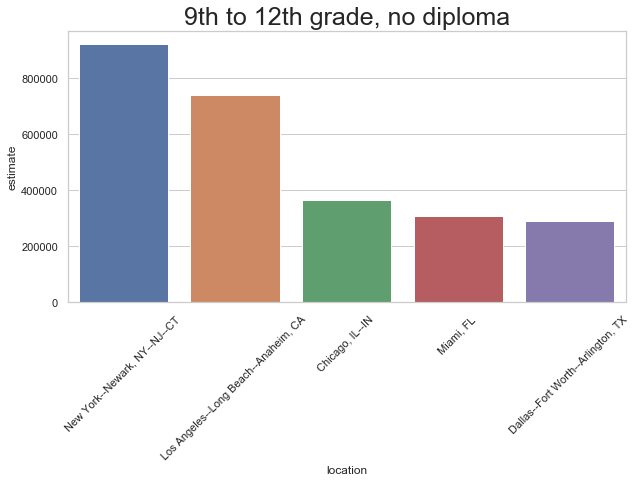

In [8]:
group = '9th to 12th grade, no diploma'
group_df = df[df.group == group].sort_values(by = 'estimate', ascending = False).head(5).reset_index(drop = True)
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = group_df, x = 'location', y = 'estimate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title(group, fontsize = 25)
plt.show()

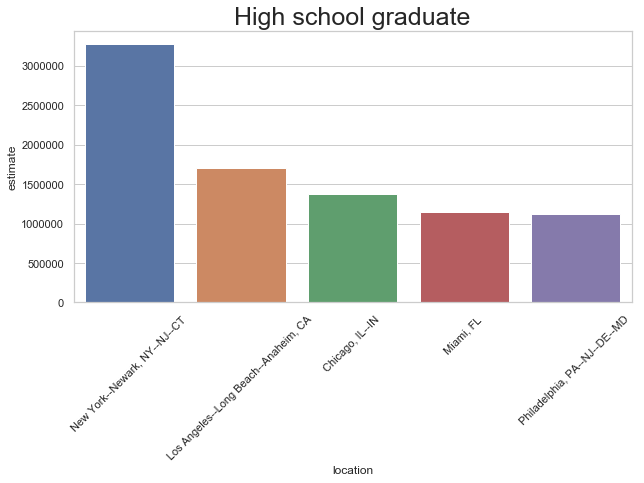

In [9]:
group = 'High school graduate'
group_df = df[df.group == group].sort_values(by = 'estimate', ascending = False).head(5).reset_index(drop = True)
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = group_df, x = 'location', y = 'estimate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title(group, fontsize = 25)
plt.show()

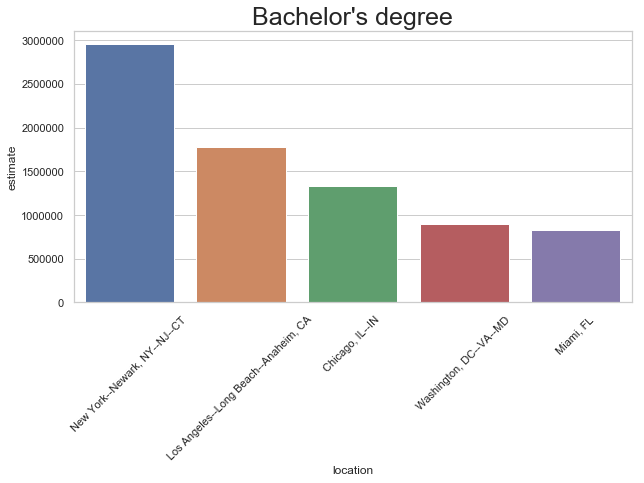

In [10]:
group = "Bachelor's degree"
group_df = df[df.group == group].sort_values(by = 'estimate', ascending = False).head(5).reset_index(drop = True)
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = group_df, x = 'location', y = 'estimate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title(group, fontsize = 25)
plt.show()

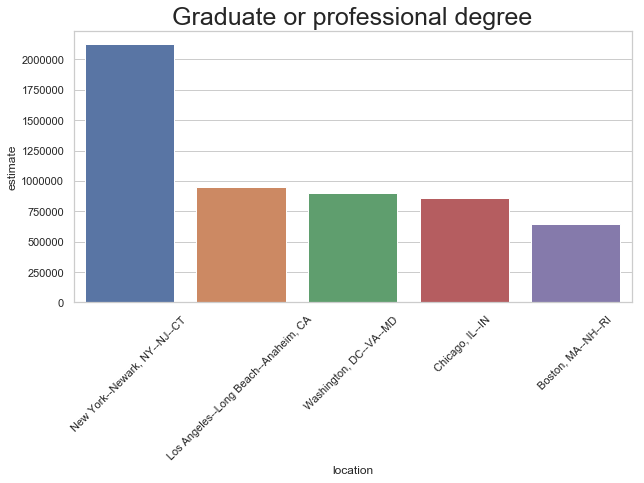

In [11]:
group ='Graduate or professional degree'
group_df = df[df.group == group].sort_values(by = 'estimate', ascending = False).head(5).reset_index(drop = True)
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = group_df, x = 'location', y = 'estimate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title(group, fontsize = 25)
plt.show()